# Face Detection

In [64]:
%%bash
pip install opencv-python --quiet
pip install dlib --quiet
pip install mtcnn --quiet

# Face Detection

## Haar Cascade Face Detection

**Sources:**

[Examples](https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81)

[CV2 SSD Example Google Colab Notebook](https://colab.research.google.com/github/dortmans/ml_notebooks/blob/master/face_detection.ipynb#scrollTo=UZp-xlhYI1SL)

[CV2 Docs](https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Object_Detection_Face_Detection_Haar_Cascade_Classifiers.php)


In [65]:
import cv2
from google.colab.patches import cv2_imshow

In [66]:
!wget --output-document='test.jpg' "https://cdn.vox-cdn.com/thumbor/sK3gMTENF_LR1DhAUl9e3V_5jC4=/0x0:2592x2017/1200x800/filters:focal(1089x801:1503x1215)/cdn.vox-cdn.com/uploads/chorus_image/image/65282724/friendscast.0.0.1429818191.0.jpg"

--2022-10-01 17:59:02--  https://cdn.vox-cdn.com/thumbor/sK3gMTENF_LR1DhAUl9e3V_5jC4=/0x0:2592x2017/1200x800/filters:focal(1089x801:1503x1215)/cdn.vox-cdn.com/uploads/chorus_image/image/65282724/friendscast.0.0.1429818191.0.jpg
Resolving cdn.vox-cdn.com (cdn.vox-cdn.com)... 199.232.192.124, 199.232.196.124
Connecting to cdn.vox-cdn.com (cdn.vox-cdn.com)|199.232.192.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96675 (94K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  94.41K  --.-KB/s    in 0.008s  

2022-10-01 17:59:02 (11.0 MB/s) - ‘test.jpg’ saved [96675/96675]



In [174]:
# View available Haar template files
# cv2.data.haarcascades

In [175]:
# !ls /usr/local/lib/python3.7/dist-packages/cv2/data/

In [185]:
# Load our haar classifier
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# import cv2
img = cv2.imread('test.jpg')

In [186]:
%%time


faces = classifier.detectMultiScale(img)# result



CPU times: user 930 ms, sys: 3.62 ms, total: 934 ms
Wall time: 486 ms


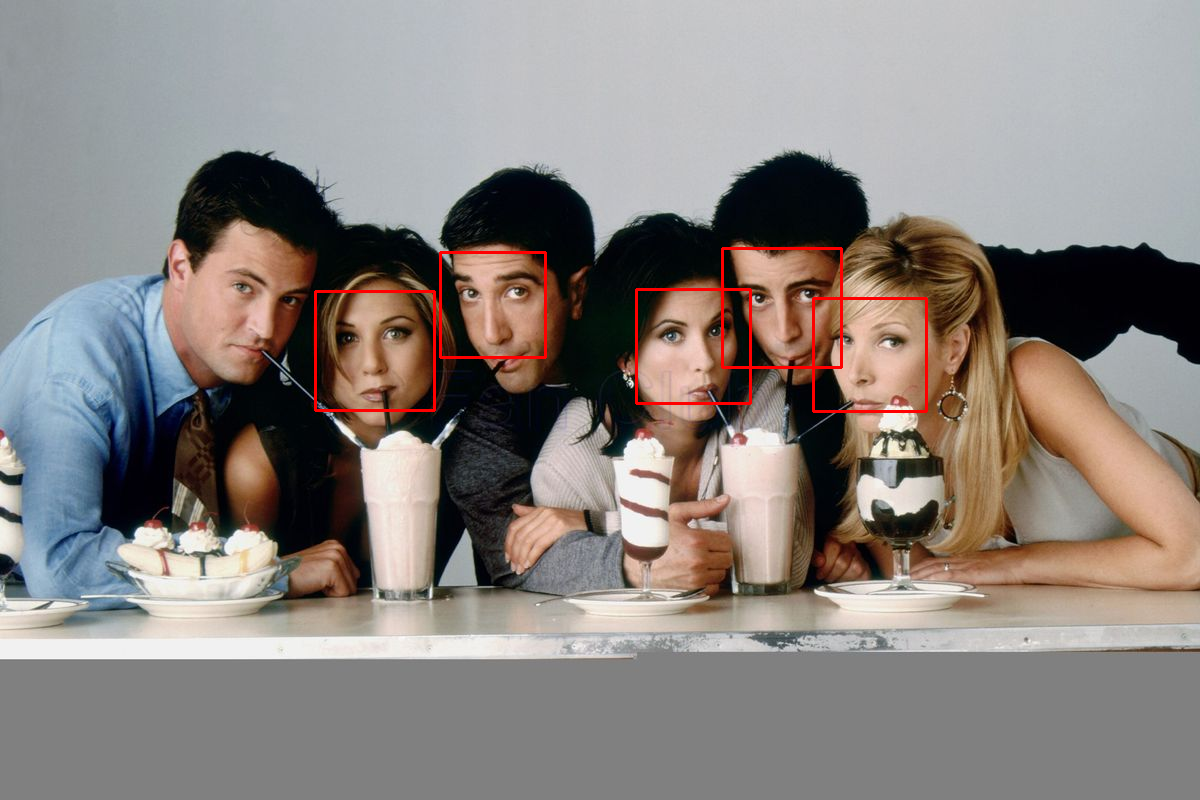

In [183]:
#to draw faces on image
for result in faces:
    x, y, w, h = result
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
    
# Display the output
# cv2.imshow('img', img)
cv2_imshow(img)

In [184]:
%%timeit
img = cv2.imread('test.jpg')
# Detect faces
faces = classifier.detectMultiScale(img)

520 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Dlib HOG


In [155]:
import dlib
import cv2

In [187]:
detector = dlib.get_frontal_face_detector()
img = cv2.imread('test.jpg')

In [188]:
%%time

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray, 1) # result


CPU times: user 491 ms, sys: 7.6 ms, total: 499 ms
Wall time: 497 ms


In [189]:
#to draw faces on image
for result in faces:
  x = result.left()
  y = result.top()
  x1 = result.right()
  y1 = result.bottom()
  cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)

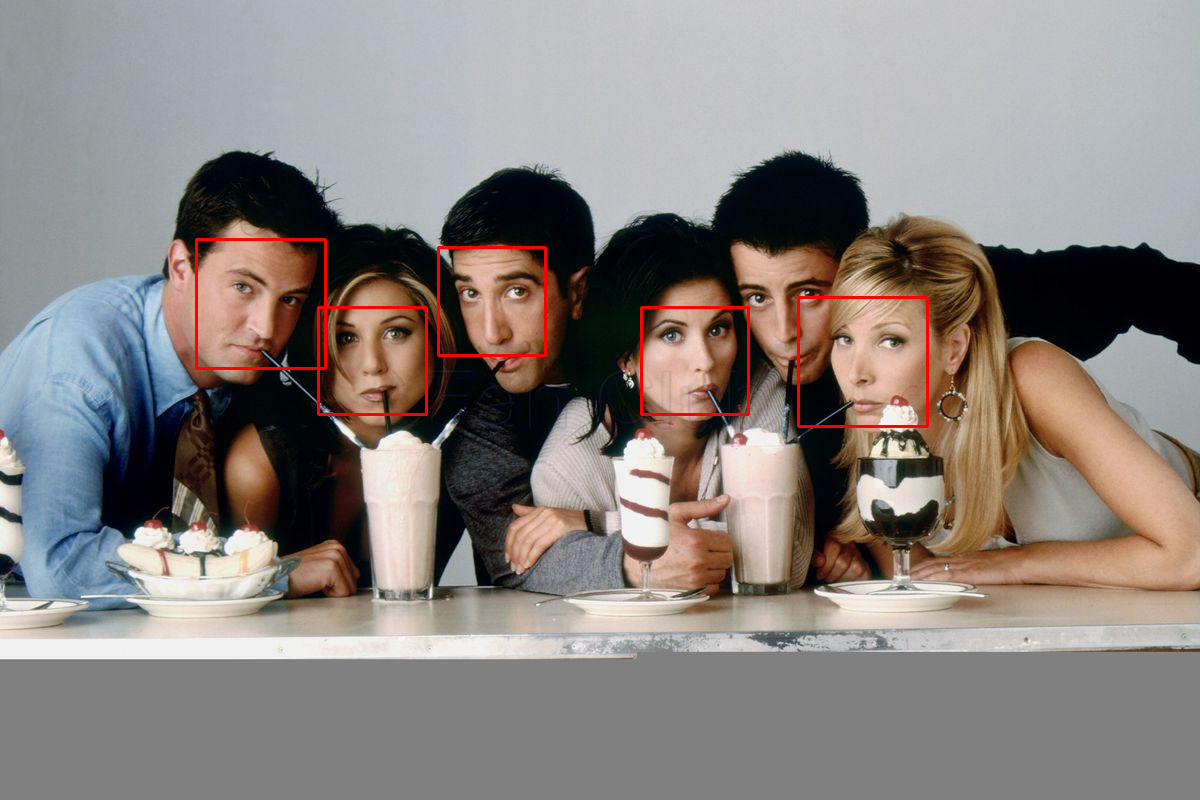

In [190]:
# Display the output
# cv2.imshow('img', img)
cv2_imshow(img) # COLAB SPECIFIC

In [191]:
%%timeit
detector = dlib.get_frontal_face_detector()
img = cv2.imread('test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = detector(gray, 1) # result

955 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# MTCNN

In [193]:
import cv2
from mtcnn.mtcnn import MTCNN

In [194]:
detector = MTCNN()
img = cv2.imread('test.jpg')

In [195]:
%%time


faces = detector.detect_faces(img)# result




CPU times: user 1.73 s, sys: 62.7 ms, total: 1.79 s
Wall time: 1.58 s


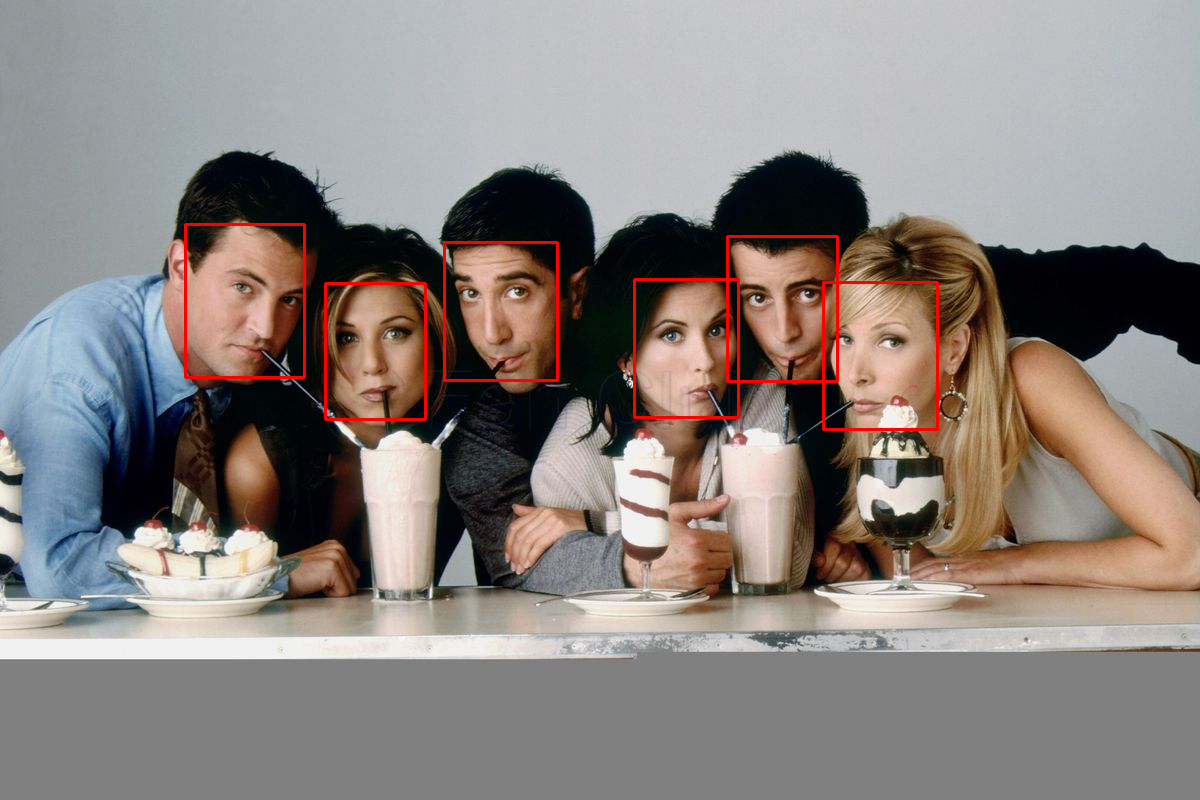

In [196]:
#to draw faces on image
for result in faces:
    x, y, w, h = result['box']
    x1, y1 = x + w, y + h
    cv2.rectangle(img, (x, y), (x1, y1), (0, 0, 255), 2)
    
# Display the output
# cv2.imshow('img', img)
cv2_imshow(img) # COLAB SPECIFIC

In [197]:
%%timeit
img = cv2.imread('test.jpg')
faces = detector.detect_faces(img)# result

1.22 s ± 39.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Frontal face detector of SSD DNN model

In [161]:
import cv2
import numpy as np


OpenCV’s deep learning face detector is based on the Single Shot Detector (SSD) framework with a ResNet base network. The network is defined and trained using the [Caffe Deep Learning framework](https://caffe.berkeleyvision.org/)

Download the pre-trained face detection model, consisting of two files:

- The network definition (deploy.prototxt)
- The learned weights (res10_300x300_ssd_iter_140000.caffemodel) 

In [162]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-10-01 19:19:36--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2022-10-01 19:19:36 (18.7 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-10-01 19:19:36--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [168]:
import imutils

print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread('test.jpg')

[INFO] loading model...


In [169]:
%%time
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()



CPU times: user 120 ms, sys: 6.07 ms, total: 126 ms
Wall time: 85.7 ms


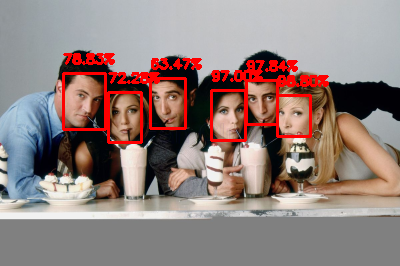

In [170]:
(h, w) = image.shape[:2]
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
  
cv2_imshow(image)

In [171]:
import imutils

print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread('test.jpg')

[INFO] loading model...


In [172]:
%%timeit
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread('test.jpg')
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

# print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()



81.7 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [173]:
%%timeit
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread('test.jpg')

19.4 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
